# Một chút Python: @dataclass

### BS. Lê Ngọc Khả Nhi

# Giới thiệu

Một khi đã làm việc ngôn ngữ Python đủ lâu, bạn sẽ quen thuộc với lập trình hướng đối tượng (OOP) và có khuynh hướng dùng nó để xây dựng giải pháp cho nhiều vấn đề, bao gồm quy trình phân tích dữ liệu. Trong bài thực hành hôm nay, Nhi sẽ giới thiệu về dataclass, một công cụ giúp cho việc code OOP nhẹ nhàng hơn rất nhiều.

In [2]:
import numpy as np
import pandas as pd

from collections import namedtuple
from dataclasses import dataclass, make_dataclass, field, fields
from typing import Any, List

import attr

import matplotlib.pyplot as plt


# Class như một cấu trúc lưu dữ liệu

Cho bài thực hành này, giả định Nhi muốn tạo ra các object lưu kết quả xét nghiệm của bệnh nhân tại phòng khám hô hấp. Nhi bắt đầu bằng 1 cấu trúc đơn giản nhất chỉ gồm 3 thành phần: ID = tên bệnh nhân, FEV1 (thể tích thở ra gắng sức trong 1 giây) và FVC (dung tích sống gắng sức) là 2 kết quả hô hấp ký của bệnh nhân này.

Chắc hẳn nhiều bạn sẽ có ý kiến rằng cho nhu cầu đơn giản như thế này, không cần phải dùng OOP ? Điều này hoàn toàn đúng, không bắt buộc phải dùng class nhưng có nhiều giải pháp thay thế khác, thí dụ:

## Dictionary

Dictionary là cấu trúc dữ liệu sẵn có hoàn toàn phù hợp với nhu cầu ta cần: ta dùng keys để chỉ tên các thông số, và values để lưu giá trị. Tuy nhiên bạn cũng nhận ra sự bất tiện của việc dùng dictionary, đó là mỗi lần muốn tạo ra 1 object, ta phải viết lại toàn bộ cấu trúc {key: value} (và có thể code sai), object được tạo ra là 1 dict như mọi dict khác. 

In [3]:
# Dùng Python dict

test_abc = {'ID': 'ABC', 
            'FEV1': 3.26,
            'FVC': 4.65
           }

test_abc

{'ID': 'ABC', 'FEV1': 3.26, 'FVC': 4.65}

## namedtuple ?

namedtuple là một công cụ khác thích hợp để lưu dữ liệu. So với dict, namedtuple có nhiều lợi thế hơn, nó có tính năng gần giống như class: Nhi có thể tạo ra một khuôn mẫu Spiro_Namedtuple, có hẳn tên gọi, thí dụ Hô hấp ký, sau đó dùng khuôn mẫu này để tạo ra hàng loạt object cho mỗi bệnh nhân.
Nhưng namedtuple lại không cho phép ta đặt ra những method bên trong nó như class... 

In [6]:
# namedtuple

Spiro_Namedtuple = namedtuple('Hô_hấp_ký', ['ID','FEV1','FVC'])

test_abc = Spiro_Namedtuple('ABC',3.26, 4.65)

test_abc

Hô_hấp_ký(ID='ABC', FEV1=3.26, FVC=4.65)

## dataframe

pandas Dataframe là một sự nâng cấp của dictionary, ta có thể xem mỗi bệnh nhân là 1 hàng trong dataframe, và dataframe nhỏ nhất chỉ gồm 1 hàng. Nếu chỉ dùng cho 1 bệnh nhân, điều này có vẻ hơi xa xỉ, nhưng sau đó ta có thể ghép nhiều hàng kết quả lại với nhau và có 1 bảng tính - các bạn làm phân tích dữ liệu khá quen với cách làm việc trên bảng như thế này, pandas sau đó cho phép làm đủ mọi thao tác trên dataframe...

Tuy nhiên, nếu kết quả xét nghiệm cho mỗi bệnh nhân không phải là một đơn vị quan sát trong bài toán thống kê, nhưng là một mắt xích liên kết trong một chương trình có mục tiêu hoàn toàn khác (thí dụ diễn giải kết quả), hoặc là một khuôn mẫu để tạo ra những cấu trúc khác nữa, như ta sẽ thấy trong phần sau, khi đó dataframe trở nên thừa và thiếu cho tất cả nhu cầu đó.

In [9]:
test_abc = {'ID': 'ABC', 
            'FEV1': 3.26,
            'FVC': 4.65
           }

test_df = pd.DataFrame(test_abc, index = ['Spirometry'])

test_df

,ID,FEV1,FVC
Spirometry,ABC,3.26,4.65


## Tại sao dùng class ?

Khi sử dụng OOP trong chương trình, dù chỉ để lưu trữ/thao tác/phân tích dữ liệu, chúng ta đang tạo ra những bản thể trừu tượng trong một thế giới ảo. Thí dụ class xét nghiệm hô hấp ký là 1 bộ phận trong các xét nghiệm tại bệnh viện, và có thể tích hợp vào một bilan xét nghiệm lớn hơn, mỗi đối tượng tạo ra là 1 cá thể trong quần thể bệnh nhân... class cho phép ta định hình đối tượng một cách riêng biệt, có tên gọi, có thuộc tính, hành vi và khả năng làm những việc khác nhau... Sau đó bằng cách cho những đối tượng này tương tác với nhau, ta sẽ xây dựng được thế giới như ta mong muốn. Mỗi class lại có thể dùng làm khuôn mẫu để tạo ra những phiên bản đối tượng khác nhau nữa. Khi dùng class, ta có thể kiểm soát mọi thứ ở mỗi cấp độ một cách linh hoạt.

## Class cổ điển

Nếu dùng class cho mục tiêu lưu trữ 3 thuộc tính nói trên, cách làm cổ điển như sau:

In [10]:
class Spiro:
    def __init__(self, ID, fev1, fvc):
        self.ID = ID
        self.FEV1 = fev1
        self.FVC = fvc
    
    def __repr__(self):
        return (f'{self.__class__.__name__}'
                f"(ID={self.ID!r}, FEV1={self.FEV1!r}, FVC={self.FVC!r})")
    
test_abc = Spiro('ABC',3.26, 4.65)

test_abc

Spiro(ID='ABC', FEV1=3.26, FVC=4.65)

Như các bạn thấy, Nhi cần viết đến 10 dòng code chỉ để tạo ra 1 khuôn mẫu class Spiro với tính năng lưu 3 thuộc tính ID, FEV1, FVC và method repr cho phép trình bày thông tin về mỗi instance của class.

## dataclass

Từ phiên bản 3.7 (năm 2018), Python giới thiệu một công cụ mới là dataclass, sử dụng nó như 1 decorator, ta có thể giảm rất nhiều công sức cho việc tạo 1 class lưu trữ dữ liệu với cùng tính năng như trên, chỉ cần 5 dòng code.

In [11]:
@dataclass
class Spirometry:
    ID: str
    FEV1: float
    FVC: float
        
test_abc = Spirometry('ABC',3.26, 4.65)

test_abc

Spirometry(ID='ABC', FEV1=3.26, FVC=4.65)

Như vậy, decorator @dataclass đã tự động thiết lập 2 dunder methods init và repr cho ta 

Ghi chú: module attr cho phép làm điều tương tự, nhưng với cú pháp phức tạp hơn nhiều: 

In [12]:
@attr.s
class Spirometry:
    ID = attr.ib()
    FEV1 = attr.ib()
    FVC = attr.ib()
        
test_abc = Spirometry('ABC',3.26, 4.65)

test_abc

Spirometry(ID='ABC', FEV1=3.26, FVC=4.65)

# Những khả năng tùy chỉnh dataclass

dataclass hỗ trợ tùy chỉnh linh hoạt cho nội dung bên trong class, bao gồm:

## Giá trị mặc định

Ta có thể thiết lập giá trị mặc định cho mỗi thuộc tính, thí dụ: nếu không có tên, giá trị ID mặc định là NoName, nếu không có kết quả FEV1 hoặc FVC, giá trị mặc định là None

In [13]:
@dataclass
class Spirometry:
    ID: str = 'No Name'
    FEV1: float = None
    FVC: float = None
        
na_case = Spirometry(FEV1 = 3.2)

na_case

Spirometry(ID='No Name', FEV1=3.2, FVC=None)

# Tạo method cho dataclass và bổ sung method init

Không chỉ đơn giản dùng để lưu dữ liệu dưới dạng thuộc tính, dataclass cũng là một class, ta hoàn toàn có thể tạo ra những method cho nó. Thí dụ đơn giản nhất, Nhi muốn thêm tính tỉ số tiffneau = FEV1/FVC thì có thể viết method Tiffneau;

Ngoài ra, dataclass còn cho phép ta mở rộng/thay đổi những thuộc tính do dunder init mặc định (và ẩn) đã tạo, bằng cách viết thêm 1 dunder method khác là post_init; bằng cách này, khi khởi tạo instance, cả 2 method init và post_init sẽ lần lượt thi hành để tạo ra đầy đủ các thuộc tính như ta muốn.

In [18]:
@dataclass
class Spirometry:
    ID: str = 'No Name'
    FEV1: float = 0.0
    FVC: float = 0.0
    
    def Tiffneau(self):
        
        if self.FVC == 0.0:
            return None
        else:
            return round(self.FEV1/self.FVC, 3)
        
    def __post_init__(self):
        self.tiffneau = self.Tiffneau()

Khi chỉ có FEV1, method Tiffneau xuất ra giá trị rỗng (None)

In [19]:
na_case = Spirometry(FEV1 = 3.2)

print(na_case)

na_case.Tiffneau()

Spirometry(ID='No Name', FEV1=3.2, FVC=0.0)


In [20]:
case = Spirometry('BN_123', 3.762, 5.184)

print(case)

case.Tiffneau()

Spirometry(ID='BN_123', FEV1=3.762, FVC=5.184)


0.726

In [21]:
case.tiffneau

0.726

## Tùy chỉnh cho từng field 

Trong thí dụ trên, mặc dù thuộc tính tiffneau được sinh ra từ khi khởi tạo clas, nó không hiển thị một cách mặc định thông qua method repr, Nhi sử dụng method field() để tùy chỉnh hành vi của class ở cấp độ thuộc tính. Cụ thể, Nhi thiết kế sẵn 1 field cho thuộc tính tiffneau, kiểu dữ liệu là float, giá trị mặc định là None, nó không được tự động tạo ra bằng method init, nhưng được in ra thông qua method repr.

Sau đó, khi Nhi dùng method post_init để khởi tạo thuộc tính tiffneau, nó có thể được hiển thị khi gọi instance case

In [22]:
@dataclass
class Spirometry:
    ID: str = 'No Name'
    FEV1: float = 0.0
    FVC: float = 0.0
    tiffneau: float = field(default = None, 
                            init = False, 
                            repr = True)
    
    def Tiffneau(self):
        
        if self.FVC  == 0:
            return None
        else:
            return round(self.FEV1/self.FVC, 3)
        
    def __post_init__(self):
        self.tiffneau = self.Tiffneau()

In [23]:
case = Spirometry('BN_123', 3.762, 5.184)

case

Spirometry(ID='BN_123', FEV1=3.762, FVC=5.184, tiffneau=0.726)

## Inheritance giữa các dataclass

1 dataclass có thể kế thừa từ dataclass khác, giống như cách ta làm inheritance cho class thông thường. Tính năng Inheritance cho phép dùng 1 class làm khuôn mẫu để tạo ra nhiều phiên bản khác, hay nói cách khác, ta có thể cho 1 class thừa hưởng toàn bộ thuộc tính và method từ class mẫu.

Trong thí dụ sau, Nhi tạo trước 1 class PFT (Pulmonary function test) với 3 thuộc tính: name = tên BN, meas = kết quả đo được, pred = giá trị tham chiếu, sau đó dùng nó làm khuôn mẫu để tạo class Spirometry. Ta lại tiếp tục dùng post_init để gán giá trị meas vào tên thuộc tính fev1, và tính tỉ lệ % giá trị tham chiếu bằng công thức percentage = 100*fev1/pred

Một lần nữa ta dùng field để tùy chỉnh cho riêng từng thuộc tính, thí dụ meas và pred được khởi tạo , tồn tại nhưng không được in ra, ngược lại fev1 và perc thì có thể in ra.

In [24]:
@dataclass
class PFT:
    name: str = 'No_name'
    meas: float = field(default = 0.0, init = True, repr = False)
    pred: float = field(default = 0.0, init = True, repr = False)
        
@dataclass
class Spirometry(PFT):
    fev1: float = field(init = False)
    perc: float = field(init = False)
    
    def __post_init__(self):
        self.fev1 = self.meas
        if self.pred == 0:
            self.perc = None
        else:
            self.perc = round(100*self.fev1/self.pred, 3)

In [25]:
case = Spirometry('BN_ABC', 3.27, 3.68)

case

Spirometry(name='BN_ABC', fev1=3.27, perc=88.859)

## Tạo chuỗi dữ liệu từ khuôn mẫu dataclass

Trong thí dụ tiếp theo, ta dùng 2 dataclass để lưu dữ liệu cho một xét nghiệm phản ứng tính phế quản bằng hoạt chất kích thích histamine. Quy trình xét nghiệm này như sau: đo hô hấp kí (FEV1) ở điều kiện cơ bản, sau đó cho bệnh nhân hít những liều histamine tăng dần, và mỗi lần như vậy đo lại FEV1; từ đó cho phép dựng được đồ thị Liều/đáp ứng. Nếu bệnh nhân có tình trạng quá mẫn cảm, tăng phản ứng tính (thí dụ bệnh hen phế quản), FEV1 sẽ giảm nghiêm trọng ở 1 liều thuốc vốn không gây ra đáp ứng trên người bình thường.

Đầu tiên, Nhi tạo dataclass Spirometry với 4 thuộc tính:

Dose: liều thuốc, giá trị mặc định = 0.0, có thể in ra,

FEV1: giá trị mặc định = 0.0, có thể in ra,

base: giá trị liều cơ bản, giá trị mặc định = None, không in ra

change: giá trị mặc định = 0, có thể in ra,

Sau đó, dùng method post_init để kiểm tra nếu Dose = 0.0 thì change = 0.0, nếu Dose khác 0, sẽ tính mức độ sụt giảm FEV1 bằng cách trừ cho giá trị base

Cuối cùng, tạo class Histamine với thuộc tính result là 1 list gồm nhiều đối tượng class Spirometry

In [31]:
@dataclass
class Spirometry:
    Dose: float = field(default = 0.0, repr = True)
    FEV1: float = field(default = 0.0, repr = True)
    base: float = field(default = None, repr = False)
    change: float = field(default = 0.0, init = True, repr=True)
    
    def __post_init__(self):
        if self.Dose == 0:
            self.change = 0.0
        else:
            self.change = round((self.FEV1 - self.base)/self.base, 3)
    
@dataclass
class Histamine:
    result: List[Spirometry]

Ta sử dụng 2 class trên như sau:

In [33]:
step_1 = Spirometry(0.0, 3.81)
base = step_1.FEV1
step_2 = Spirometry(0.1, 3.42, base)
step_3 = Spirometry(0.25, 3.4352, base)
step_4 = Spirometry(0.5, 3.236, base)

hist_test = Histamine([step_1,step_2, step_3, step_4])

hist_test

Histamine(result=[Spirometry(Dose=0.0, FEV1=3.81, change=0.0), Spirometry(Dose=0.1, FEV1=3.42, change=-0.102), Spirometry(Dose=0.25, FEV1=3.4352, change=-0.098), Spirometry(Dose=0.5, FEV1=3.236, change=-0.151)])

Như các bạn thấy, hist_test là 1 instance của class Histamine, chứa 1 list gồm nhiều instance của class Spirometry.

Một cách làm khác, đó là xuất phát từ 2 list riêng biệt chứa chuỗi dữ liệu liều thuốc và fev1, Nhi viết hàm combine_result, hàm này xuất ra 1 list,  được tạo ra bằng list comprehension kết hợp với class Spirometry; sau đó Nhi tạo ra 1 dataclass Histamine sử dụng tính năng default_factory của field cho result, tính năng này cho phép dùng hàm combine_result bên ngoài để sinh dũ liệu cho list result.

Để mọi thứ hoàn hảo hơn, Nhi viết thêm method repr để in ra nội dung 2 list dose và change, khi gọi instance của class Histamine;

Ngoài ra, Nhi viết method plot_curve cho phép vẽ đồ thị Liều/Đáp ứng cho xét nghiệm; như vậy ta có thể khảo sát trực quan kết quả xét nghiệm của bệnh nhân:

In [34]:
dose = [0.0, 0.1, 0.25, 0.5, 1]
fev1 = [3.81, 3.42, 3.4352, 3.236, 3.047]

def combine_result():
    return([Spirometry(d,m,fev1[0]) for d,m in zip(dose, fev1)])

@dataclass
class Histamine:
    result: List[Spirometry] = field(default_factory = combine_result)
    
    def __repr__(self):
        dose = [s.Dose for s in self.result]
        res = [s.change for s in self.result]
        n = len(dose)
        return f"Test phản ứng tính phế quản Histamine\n{n} liều:{dose}\nĐáp ứng:{res}"
    
    def plot_curve(self):
        
        plt.plot([s.Dose for s in self.result],
                 [s.change for s in self.result],
                 '.-r')
        
        plt.xlabel('Liều')
        plt.ylabel('Đáp ứng')
        
        plt.show()

In [35]:
hist_test = Histamine()

hist_test

Test phản ứng tính phế quản Histamine
5 liều:[0.0, 0.1, 0.25, 0.5, 1]
Đáp ứng:[0.0, -0.102, -0.098, -0.151, -0.2]

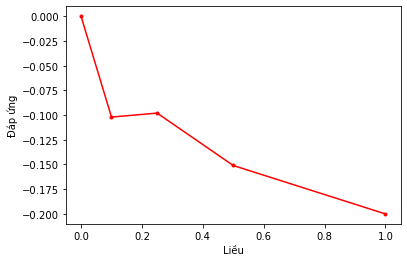

In [36]:
hist_test.plot_curve()

# Tổng kết

Bài thực hành đã hết. Qua bài này, các bạn đã làm quen với một công cụ rất mạnh để lập trình OOP dưới dạng decorator là dataclass. Chỉ mất một chút công sức bỏ ra để thích nghi về cú pháp so với cách viết code OOP cổ điển, nhưng hiệu quả mang lại là rất lớn, đặc biệt khi bạn dùng OOP để tạo ra những cấu trúc lưu trữ dữ liệu.